In [177]:
using Plots
using Statistics
using LinearAlgebra
using JSON

### 2.230 Population Dynamics

An ecosystem consists of $n$ species that interact (say, by eating other species, eating each other's food sources, eating each other's predators, and so on). We let $x(t) \in \mathbb{R}^{n}$ be the vector of deviations of the species populations (say, in thousands) from some equilibrium values (which don't matter here), in time period (say, month) $t$. In this model, time will take on the discrete values $t=0,1,2, \ldots . .$ Thus $x_{3}(4)<0$ means that the population of species 3 in time period 4 is below its equilibrium level. (It does not mean the population of species 3 is negative in time period $4 .$ ) The population (deviations) follows a discrete-time linear dynamical system:

$x(t+1)=A x(t)$

We refer to x(0)as the initial population perturbation. The questions below pertain to the specific case with n=10 species, with matrix A given in pop_dyn_data.m

In [2]:
# ; wget http://ee263.stanford.edu/hw/pop_dyn_data.json

In [1]:
# ; wget http://ee263.stanford.edu/hw/readclassjson.jl

## a) 

Suppose the initial perturbation is $x(0)=e_{4}$ (meaning, we inject one thousand new creatures of species 4 into the ecosystem at $t=0$ ). How long will it take to affect the other species populations? In other words, report a vector $s,$ where $s_{i}$ is the smallest $t$ for which $x_{i}(t) \neq 0 .$ (We have $s_{4}=0$ ).

In [183]:
include("readclassjson.jl")

data = readclassjson("data/pop_dyn_data.json")
A = data["A"]

e4 = zeros(10, 1)
e4[4] = 1

1

In [184]:
s = zeros(10, 1)
zs = 10
t = 0
x_t = e4
while zs > 1
    x = A * x_t
    x_t = x
    t += 1
    inter = intersect(findall(s->s==0, s),  findall(x->x!=0, x_t))
    idx = filter(e-> e != CartesianIndex(4, 1), inter)
    s[idx] .= t
    zs = sum(s.==0)
end


In [185]:
s

10×1 Array{Float64,2}:
 4.0
 2.0
 1.0
 0.0
 4.0
 3.0
 3.0
 2.0
 4.0
 3.0

## b) Population control

We can choose any initial perturbation that satisfies $\left|x_{i}(0)\right| \leq 1$ for each $i=1, \ldots, 10 .$ (We achieve this by introducing additional creatures and/or hunting and fishing.) What initial perturbation $x(0)$ would you choose in order to maximize the population of species 1 at time $t=10 ?$ Explain your reasoning. Give the initial perturbation, and using your selected initial perturbation, give $x_{1}(10)$ and plot $x_{1}(t)$ versus $t$ for $t=0, \ldots, 40$

First, each vector x(t) is formed by multiplying A by the output of the last multiplication, x(t-1). Therefore to get from t=0 to t=10 directly, we can multiply x(0) by A 10 times in a row, or equivalently by $A^{10}$. 

In [145]:
A10 = A^10

10×10 Array{Float64,2}:
 -0.141283   -0.222126    0.211576   -0.109539   …   0.0728288   -0.00669028
  0.189949    0.178999   -0.224136    0.130759      -0.0292531    0.0220555
 -0.329879   -0.290752    0.378378   -0.227495       0.046582    -0.0394566
  0.132577    0.141948   -0.160779    0.0929931     -0.0289555    0.0132879
  0.0253133   0.0366763  -0.0361538   0.0191936     -0.0113601    0.00180215
 -0.236533   -0.305988    0.318023   -0.174102   …   0.0844258   -0.0198052
 -0.339636   -0.43558     0.453029   -0.249089       0.118378    -0.0288531
 -0.13614    -0.121563    0.159938   -0.094182       0.0200446   -0.0161335
 -0.151151   -0.213296    0.211637   -0.113919       0.0650082   -0.0110078
 -0.0323288  -0.0148114   0.0314869  -0.0208241     -0.00337123   0.00540534

Second, we saw in class that in the equation y = Ax, $y_i$ is the inner product  of the ith row of A with x. Thus in $ x(10) = A^{10} x(0)$, $x_1(10) = \langle A^{10}_{1.}, x(0)\rangle$. With the constraint $\left|x_{i}(0)\right| \leq 1$, it is then clear that the x(0) that maximizes $x_i(10)$ will have -1 entries to maximize the addition of negative entries of $A^{10}_{1.}$ and +1 entries to maximize the positive entries. Looking at $A^{10}_1$:

In [157]:
A10[1, :]

10-element Array{Float64,1}:
 -0.14128324295499142
 -0.2221257123811655
  0.21157593252145163
 -0.1095387185207043
  0.003971427594502857
  0.07758131191295213
  0.06070967438130133
  0.15773848291090417
  0.07282876866893216
 -0.006690275989246299

In [158]:
x_0 = A10[1, :] ./ abs.(A10[1, :])

10-element Array{Float64,1}:
 -1.0
 -1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
 -1.0

Therefore the maximum value of $x_1(10)$ is given by:

In [182]:
(A10 * x_0)[1]

1.0640435478361518

Turning to the plot of $x_1(t)$ over time:

In [179]:
t = 1:40
x_t = x_0
x_1 = [x_0[1]]
for i in t
    x = A * x_t
    append!(x_1, x[1])
    x_t = x
end    

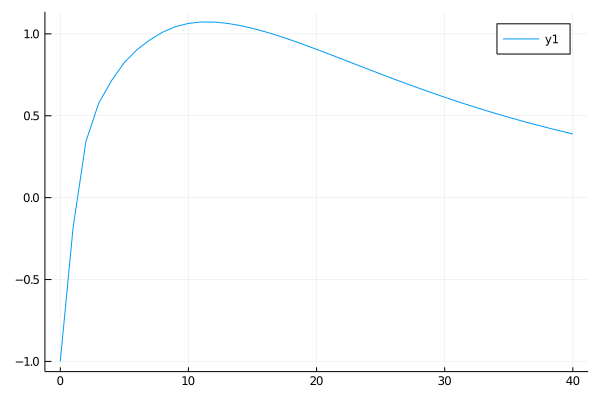

In [181]:

plot([0; t],x_1)
